In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
plt.style.use('bmh')
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [119]:
stock_df = pd.read_csv('1767133-1729258-1613615-Stock_Price_data_set_(1).csv') 

In [120]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [121]:

stock_df.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000


In [122]:
stock_df['Date'] = pd.to_datetime(stock_df.Date)

In [123]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


In [124]:
stock_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [125]:
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [126]:
stock_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [127]:
stock_df.duplicated().sum()

0

In [128]:
stock_df['Close'].equals(stock_df['Adj Close'])


True

In [129]:
#stock_df1 = stock_df.T.drop_duplicates().T
stock_df.pop("Close")

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [130]:
stock_df.head()

,Date,Open,High,Low,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [131]:
stock_df.duplicated().sum()

0

In [132]:
stock_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64

In [133]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Adj Close  1009 non-null   float64       
 5   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.4 KB


In [134]:
stock_df.describe()

,Open,High,Low,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07


In [135]:
print(len(stock_df))

1009


<AxesSubplot:>

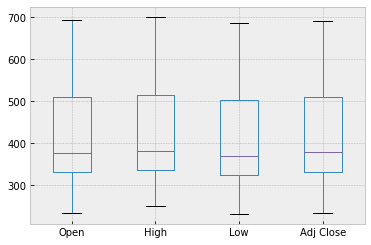

In [136]:
stock_df[['Open','High','Low','Adj Close']].plot(kind = 'box')

<AxesSubplot:>

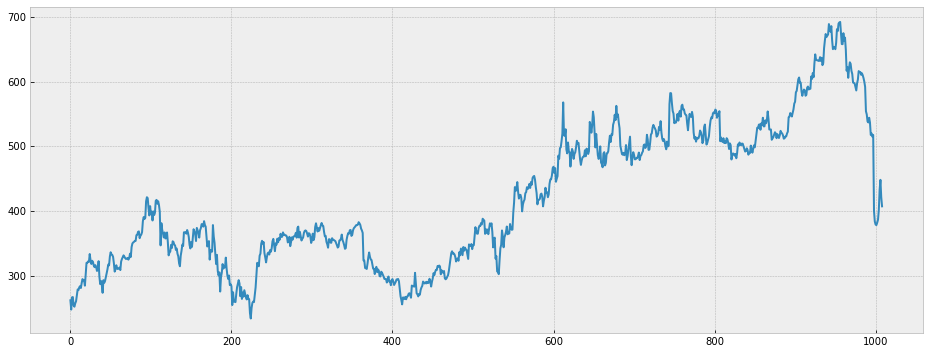

In [137]:
stock_df['Open'].plot(figsize=(16,6))

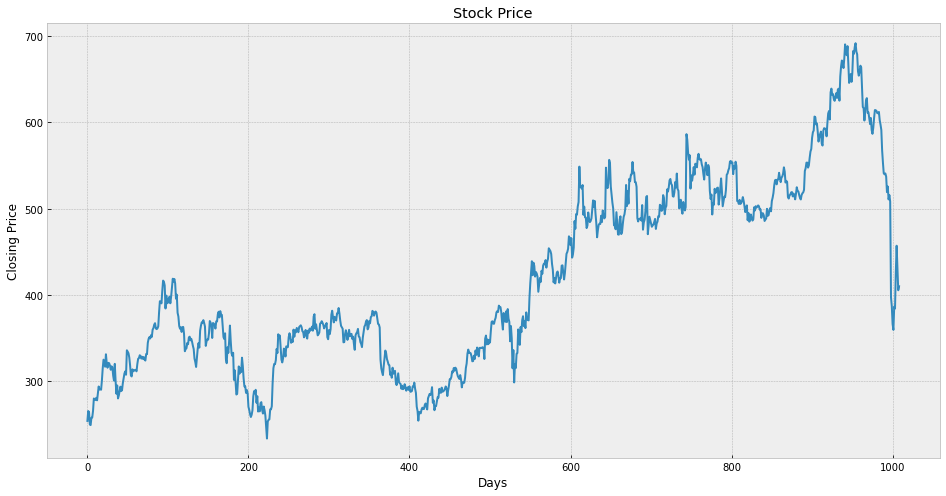

In [138]:
plt.figure(figsize =(16,8))
plt.title('Stock Price')
plt.plot(stock_df['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.show()

In [139]:
stock_df = stock_df[['Adj Close']]
stock_df.head(4)

,Adj Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006


In [140]:
future_days = 25

stock_df['Prediction']= stock_df[['Adj Close']].shift(-future_days)
stock_df.head(4)

<ipython-input-140-09faec528fc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df['Prediction']= stock_df[['Adj Close']].shift(-future_days)


,Adj Close,Prediction
0,254.259995,315.880005
1,265.720001,321.549988
2,264.559998,321.089996
3,250.100006,318.450012


In [141]:
stock_df.tail(4)

,Adj Close,Prediction
1005,457.130005,NaN
1006,429.480011,NaN
1007,405.600006,NaN
1008,410.170013,NaN


In [142]:
X = np.array(stock_df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[254.259995]
 [265.720001]
 [264.559998]
 [250.100006]
 [249.470001]
 [257.950012]
 [258.269989]
 [266.      ]
 [280.269989]
 [278.519989]
 [278.549988]
 [281.040009]
 [278.140015]
 [285.929993]
 [294.160004]
 [290.609985]
 [291.380005]
 [290.390015]
 [301.049988]
 [315.      ]
 [325.220001]
 [321.160004]
 [317.      ]
 [331.440002]
 [321.299988]
 [315.880005]
 [321.549988]
 [321.089996]
 [318.450012]
 [313.480011]
 [317.5     ]
 [316.480011]
 [306.700012]
 [300.940002]
 [320.350006]
 [300.690002]
 [285.769989]
 [295.350006]
 [280.290009]
 [283.670013]
 [288.940002]
 [293.970001]
 [288.850006]
 [289.929993]
 [298.070007]
 [303.670013]
 [309.25    ]
 [311.649994]
 [307.779999]
 [336.059998]
 [334.519989]
 [332.700012]
 [327.769989]
 [318.690002]
 [307.019989]
 [305.76001 ]
 [313.980011]
 [311.76001 ]
 [312.459991]
 [313.299988]
 [313.359985]
 [311.690002]
 [320.089996]
 [326.26001 ]
 [326.890015]
 [330.299988]
 [329.600006]
 [326.459991]
 [328.529999]
 [326.130005]
 [328.190002]
 [325.

In [143]:
y = np.array(stock_df['Prediction'])[:-future_days]
print(y)

[315.880005 321.549988 321.089996 318.450012 313.480011 317.5
 316.480011 306.700012 300.940002 320.350006 300.690002 285.769989
 295.350006 280.290009 283.670013 288.940002 293.970001 288.850006
 289.929993 298.070007 303.670013 309.25     311.649994 307.779999
 336.059998 334.519989 332.700012 327.769989 318.690002 307.019989
 305.76001  313.980011 311.76001  312.459991 313.299988 313.359985
 311.690002 320.089996 326.26001  326.890015 330.299988 329.600006
 326.459991 328.529999 326.130005 328.190002 325.220001 324.179993
 331.820007 331.619995 344.720001 349.290009 351.290009 349.730011
 353.540009 351.600006 359.929993 361.809998 365.799988 367.450012
 361.399994 360.570007 361.450012 363.829987 379.929993 392.869995
 391.980011 390.399994 404.980011 416.76001  415.440002 411.089996
 384.480011 399.390015 390.390015 395.420013 391.429993 398.179993
 390.519989 398.390015 408.25     418.970001 415.630005 418.649994
 413.5      395.799988 400.480011 379.480011 375.130005 364.230011


In [144]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [145]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [147]:
x_future = stock_df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[658.289978],
       [665.640015],
       [663.840027],
       [641.900024],
       [617.77002 ],
       [616.469971],
       [602.130005],
       [612.690002],
       [625.580017],
       [628.080017],
       [611.      ],
       [611.659973],
       [604.559998],
       [597.98999 ],
       [605.039978],
       [591.059998],
       [586.72998 ],
       [593.73999 ],
       [604.919983],
       [614.23999 ],
       [614.090027],
       [613.119995],
       [610.710022],
       [610.539978],
       [612.090027]])

In [148]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[602.440002 591.150024 591.150024 567.52002  541.059998 541.059998
 651.450012 540.840027 537.219971 678.799988 525.690002 525.690002
 515.859985 633.799988 397.5      662.919983 366.420013 359.700012
 386.700012 384.359985 427.140015 457.130005 429.480011 429.480011
 540.840027]

[641.57380248 648.22717373 646.59779575 626.73735355 604.89448737
 603.71766219 590.73689524 600.29597369 611.96422177 614.22726182
 598.76615681 599.36357494 592.93656383 586.98928733 593.37104941
 580.71614756 576.79654589 583.14211925 593.26242802 601.69904766
 601.56329875 600.68521024 598.50366408 598.34973752 599.75286671]


<ipython-input-157-efd9c522b880>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


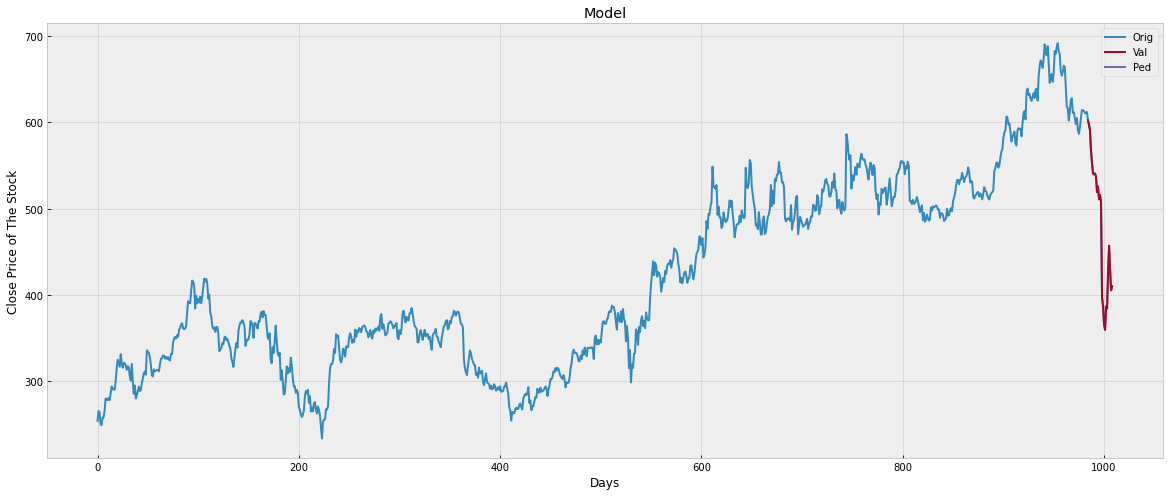

In [157]:
predictions = lr_prediction

valid = stock_df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price of The Stock')
plt.plot(stock_df['Adj Close'])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Ped'])
plt.show()

<ipython-input-153-c711ef146520>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


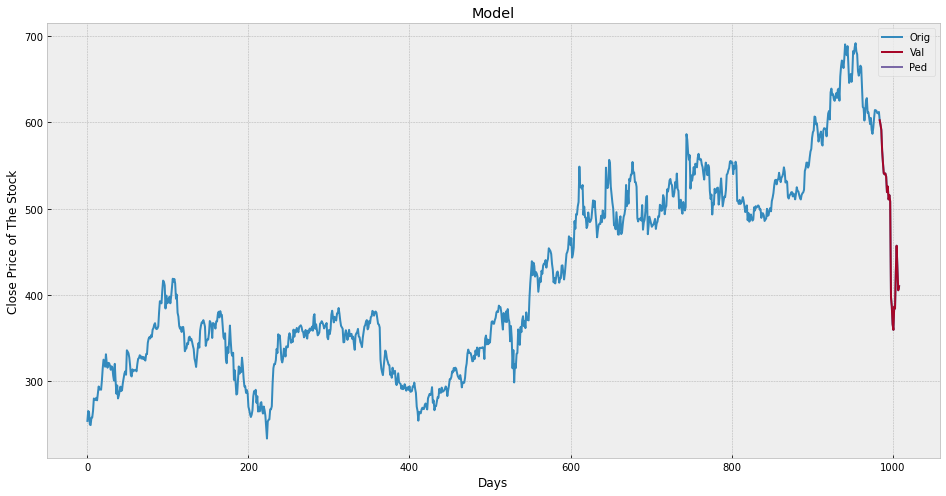

In [153]:
predictions = tree_prediction

valid = stock_df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price of The Stock')
plt.plot(stock_df['Adj Close'])
plt.plot(valid[['Adj Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Ped'])
plt.show()